# Telco Customer Churn

<img src='./churn_rate.jpg'/>

## Data

The data set is about a Telecomunication company with soma historical data about the custumers,

the data set contents 7043 rows, 21 features and a Churn columns that it is our target.

- **customerID:** customer identification,
- **gender** Female or Male
- **SeniorCitizen**  whether a customer older than 65 years or not
- **Partner**  whether the customer has a partner or not
- **Dependents** whether the customer has dependant or not
- **tenure** number of months the customer has stayed with the company
- **PhoneService** whether the customer has a phone service or not
- **MultipleLines**  whether the customer has a pmultiple line service or not
- **InternetService** whether the customer has internet service or not
- **OnlineSecurity** whether the customer has online security service or not
- **OnlineBackup** whether the customer has online backup service or not
- **DeviceProtection** whether the customer has device protection service or not
- **TechSupport** whether the customer has a tech support service or not
- **StreamingTV** whether the customer has a pstreaming service or not
- **StreamingMovies** whether the customer has a streaming movies service or not
- **Contract** type of contract
- **PaperlessBilling** whether the customer has paperless billing or not
- **PaymentMethod** The customer's paymmnt method
- **MonthlyCharges** the amount charged to the customer monthly
- **TotalCharges** the total amount charged to the customer
- **Churn** whether the customer churned or not

## Goal
The goal of this analysis is create a model to predict whether or not a customer will churn, besides with the resuls we can make some recommendation so that the companycan retain customers

## 0.- Imports and Get the Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./telco.csv')

## 1.- Data Check

In [6]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [7]:
 # info of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# verify missing data
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# statistics about dataframe
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [10]:
# change data type of TotalCharges from object to float
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# drop customerid column
df = df.drop('customerID', axis=1)

In [13]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

**Different values per column**

In [14]:
for column in df:
    unique_values = df[column].unique()
    print(f'{column}: {unique_values}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

Some columns have values like **No internet service** or **No phone service**, these values can be translated like a **No**, so I will replace these values with a No

In [15]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [16]:
for column in df:
    unique_values = df[column].unique()
    print(f'{column}: {unique_values}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [17]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Drop missing data in totalcharges

In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 2.- EDA

**Number of customer per churn category**

Text(0.5, 1.0, 'Number of Customer Churn')

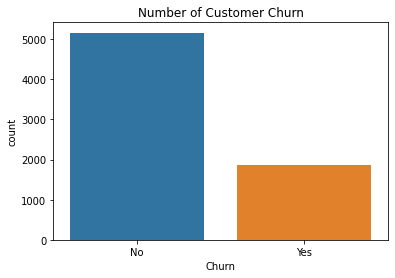

In [20]:
sns.countplot(data=df, x='Churn')
plt.title('Number of Customer Churn')

**Correlation between Features and Churn Yes Customers**

In [21]:
corr_df = df.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)

In [22]:
corr_df = pd.get_dummies(corr_df).corr()

In [23]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtection_Yes                      -0.066193
StreamingTV_No                            -0.063254
StreamingMovies_No                        -0.060860
MultipleLines_No                          -0.040033
PhoneService_No                           -0.011691
gender_Male                               -0.008545
gender_Femal

Text(0.5, 1.0, 'Features Correlation With Churn Yes')

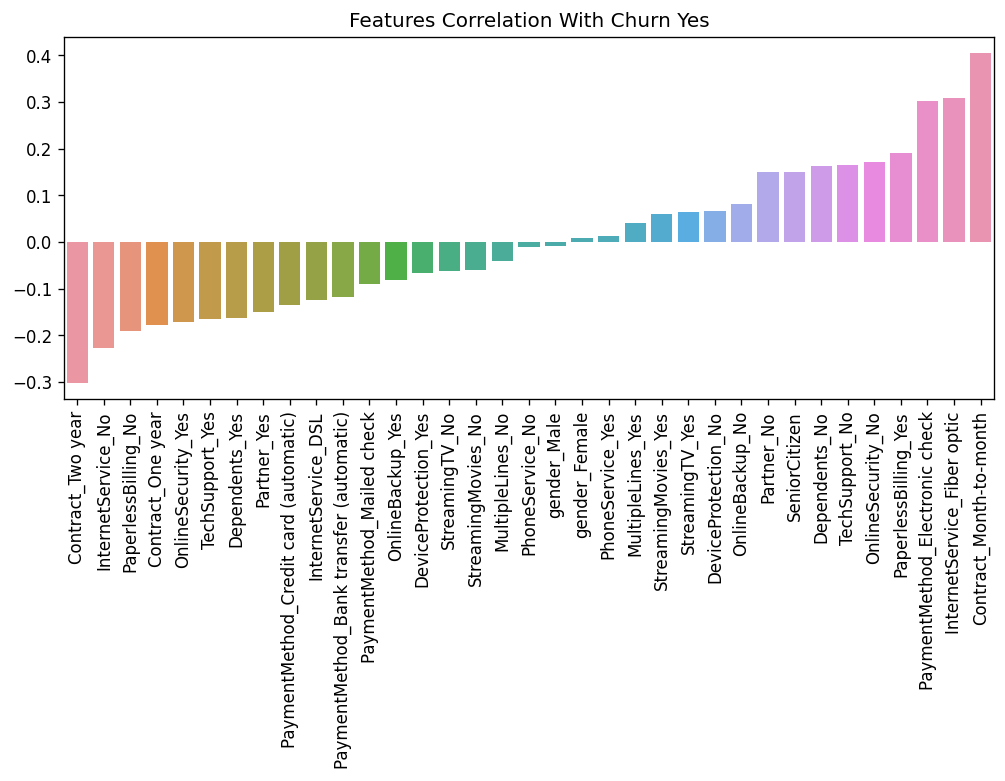

In [24]:
plt.figure(figsize=(10, 4), dpi=120)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index, 
            y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.xticks(rotation=90)
plt.title('Features Correlation With Churn Yes')

**Distribution about Tenure, Monthly Charges and TotalCharges**

Text(0.5, 0.98, 'Distribution of Tenure, Monthly Charges and Total Charges')

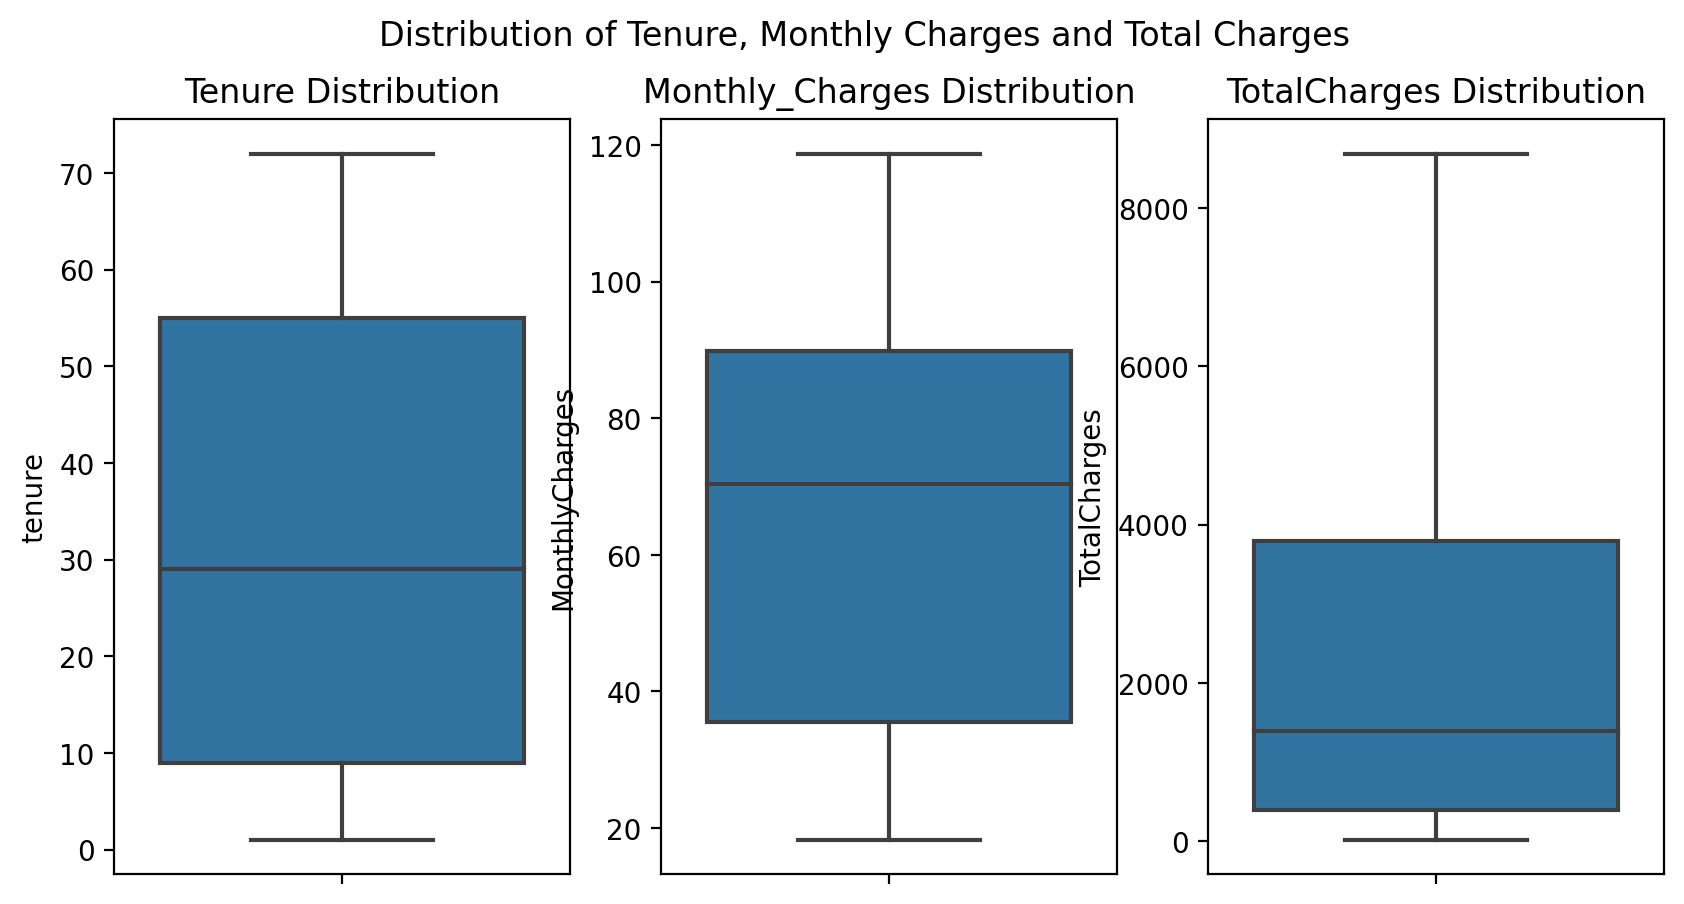

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), dpi=200)
sns.boxplot(ax=ax[0], y='tenure', data=df)
ax[0].set_title('Tenure Distribution')

sns.boxplot(ax=ax[1], y='MonthlyCharges', data=df)
ax[1].set_title('Monthly_Charges Distribution')

sns.boxplot(ax=ax[2], y='TotalCharges', data=df)
ax[2].set_title('TotalCharges Distribution')

fig.suptitle('Distribution of Tenure, Monthly Charges and Total Charges')

- Most of peaple have a tenure about less than 30 months
- Most of customers have a monthly charge greater than 75 dollars and less than 100 dollar
- In the case of Total charges most of customers have a charge less than 2000 dollars

**Distribution of TotalCharges per Contract type**

Text(0.5, 1.0, 'Distribution of TotalCharges per Contract Type')

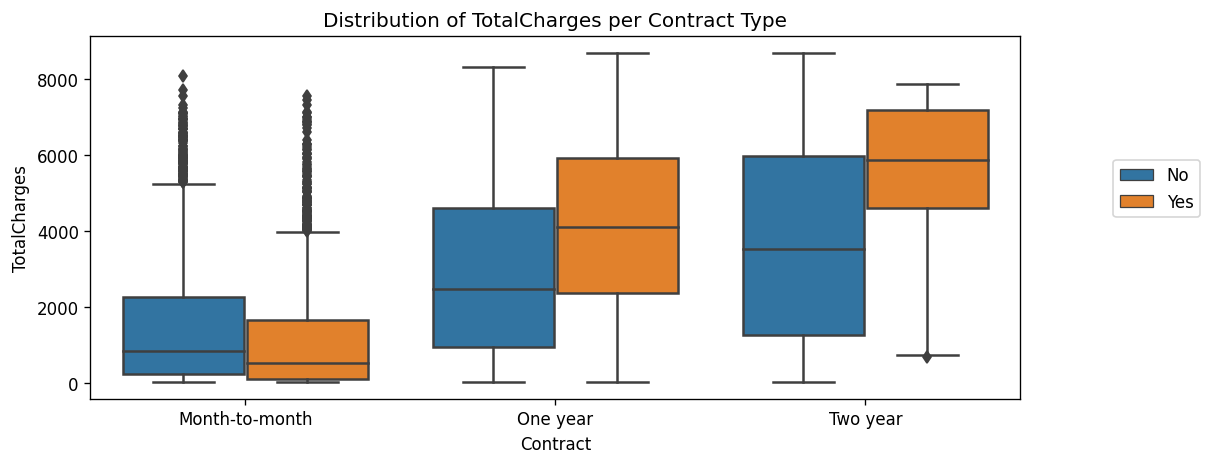

In [26]:
plt.figure(figsize=(10,4), dpi=120)
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend(loc=(1.1, 0.5))
plt.title('Distribution of TotalCharges per Contract Type')

**Distribution of TotalCharges per Churn Categories**

Text(0.5, 1.0, 'Distribution of TotalCharges per Churn Categories')

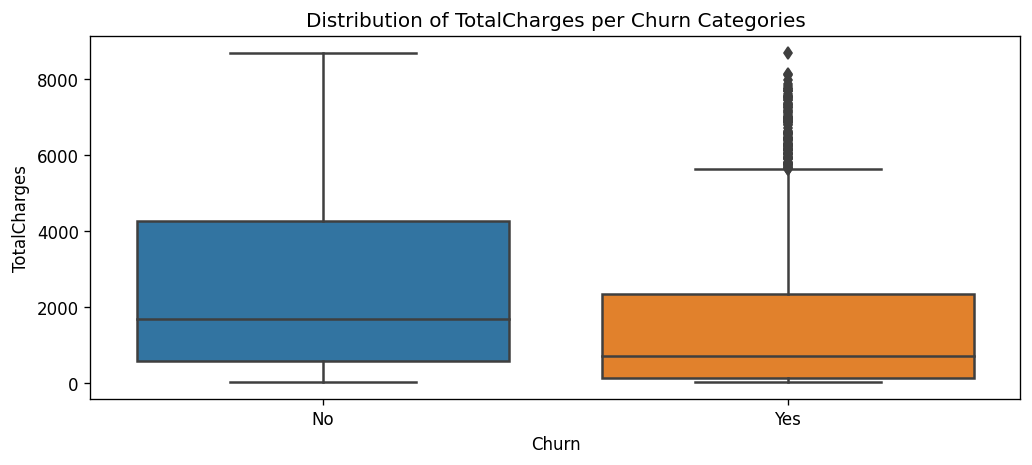

In [27]:
plt.figure(figsize=(10,4), dpi=120)
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Distribution of TotalCharges per Churn Categories')

**Number of Churn Customers per Contract Types**

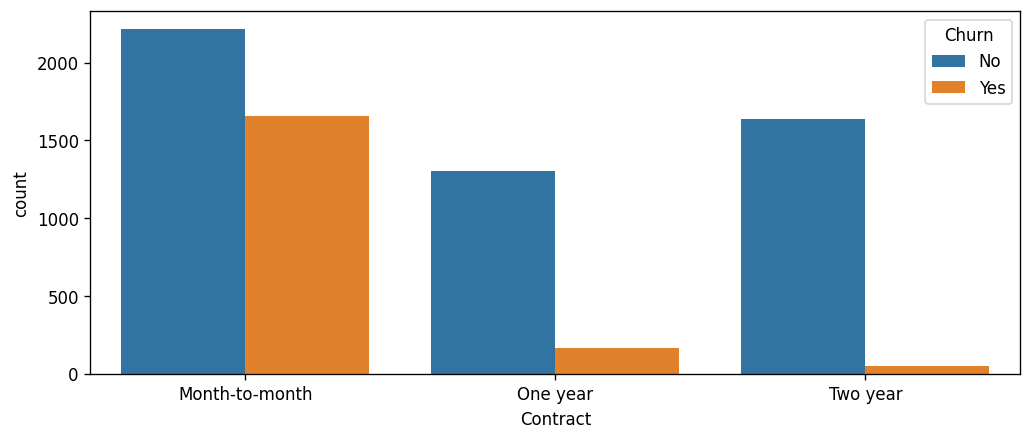

In [28]:
plt.figure(figsize=(10,4), dpi=120)
sns.countplot(data=df, x='Contract', hue='Churn')

Most of the customers who have left the company have a month-to-month contract

**Number of Churn Customers per Gender**

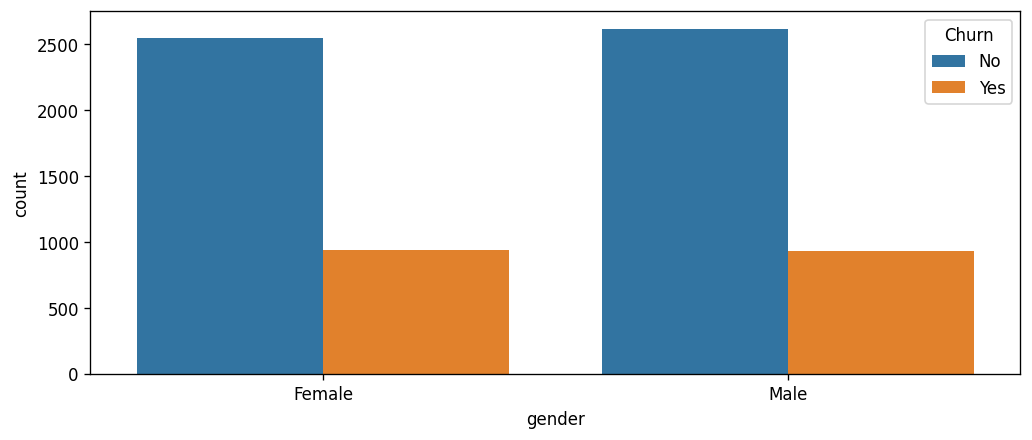

In [29]:
plt.figure(figsize=(10,4), dpi=120)
sns.countplot(data=df, x='gender', hue='Churn')

**TotalCharges per SeniorCitizen**

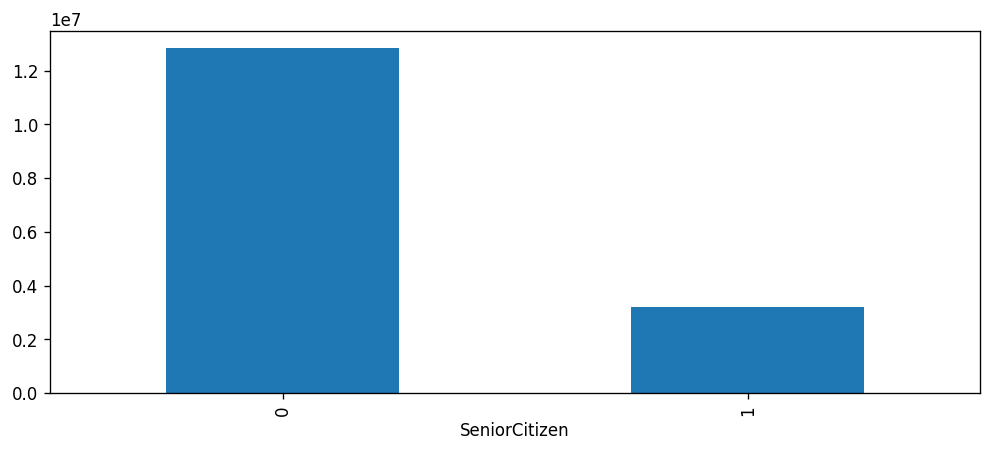

In [30]:
plt.figure(figsize=(10,4), dpi=120)
df.groupby('SeniorCitizen')['TotalCharges'].sum().plot(kind='bar')

**SeniorCitizen per Churn**

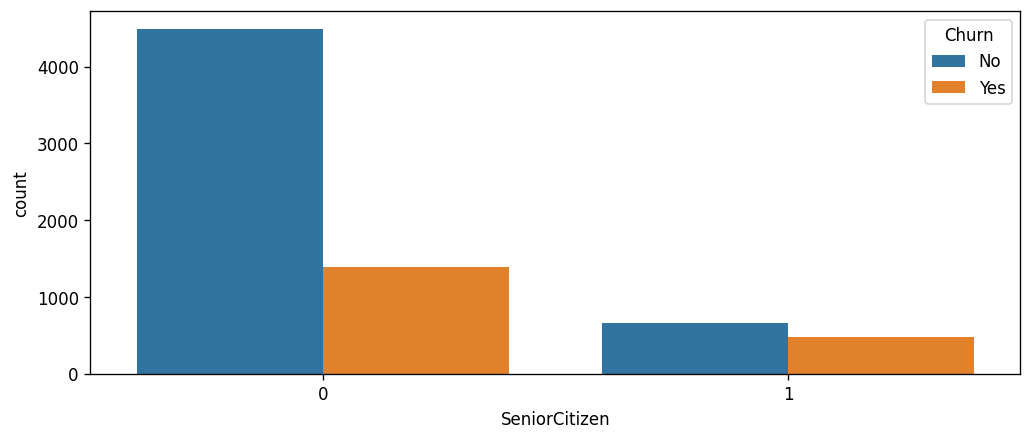

In [31]:
plt.figure(figsize=(10,4), dpi=120)
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')

**TotalCharges per Contract type, Churn category and SeniorCitizen category**

In [32]:
pd.pivot_table( data=df, index=['Contract', 'Churn', 'SeniorCitizen'], values=['TotalCharges'], aggfunc='sum')

TotalCharges
Contract       Churn SeniorCitizen              
Month-to-month No    0                2490320.05
                     1                 888359.20
               Yes   0                1229216.35
                     1                 697965.90
One year       No    0                3089204.95
                     1                 702857.35
               Yes   0                 526901.05
                     1                 148090.15
Two year       No    0                5286570.70
                     1                 735929.55
               Yes   0                 224404.35
                     1                  36349.10

People older than 65 years pay less in the month or yearly so, we can say tha they may have a discount on your bill

**Calculus of Churn Rate**

In [33]:
churn_rate = df[df.Churn == 'Yes']['Churn'].value_counts()[0]/df.Churn.value_counts()[0]

print(f'{churn_rate * 100}% of customers have abandoned the company')

36.199883788495065% of customers have abandoned the company


**Churn by Internet service**

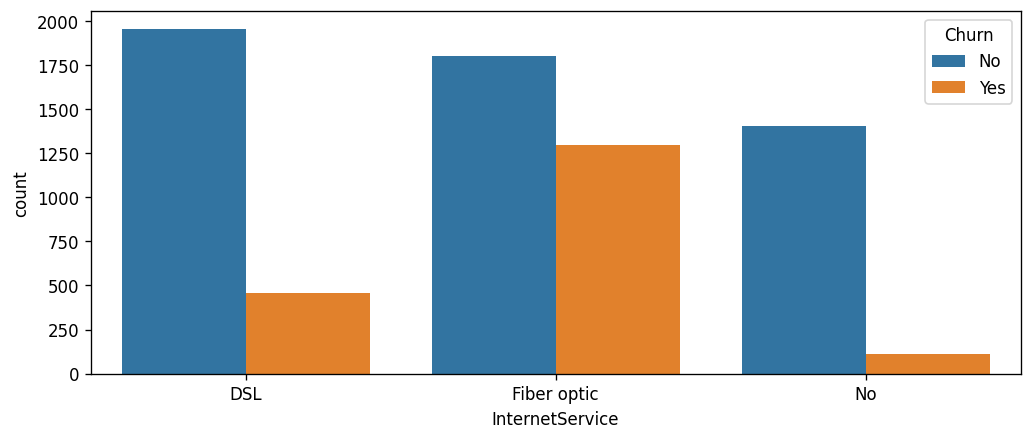

In [34]:
plt.figure(figsize=(10,4), dpi=120)
sns.countplot(data=df, x='InternetService', hue='Churn')

The largest number of churn customer in the company is the customers with an **Fiber Optic** internet service

**Churn per PaperlessNilling**

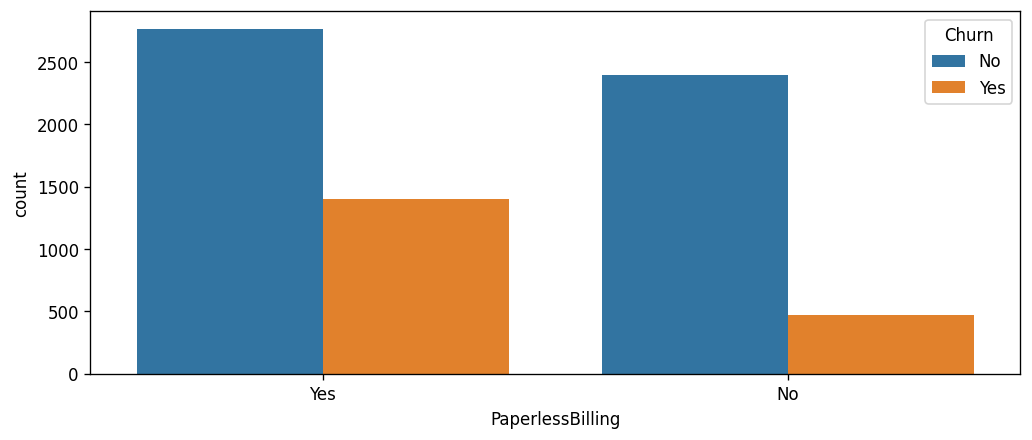

In [35]:
plt.figure(figsize=(10,4), dpi=120)
sns.countplot(data=df, x='PaperlessBilling', hue='Churn')

Most of the customers who have left the company have a paperless bill

**Churn per PaymentMethod**

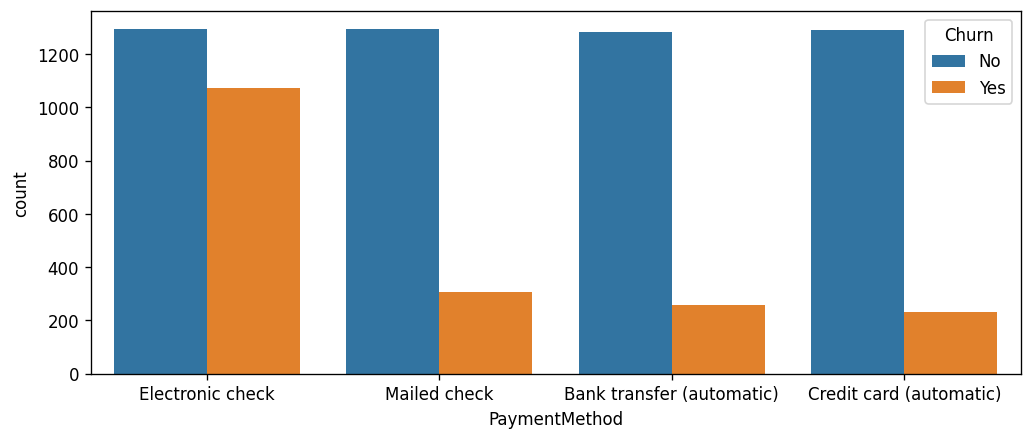

In [36]:
plt.figure(figsize=(10,4), dpi=120)
sns.countplot(data=df, x='PaymentMethod', hue='Churn')

Most of the customers who have left the company have a **Electronic Check** payment method

**Churn per Partner**

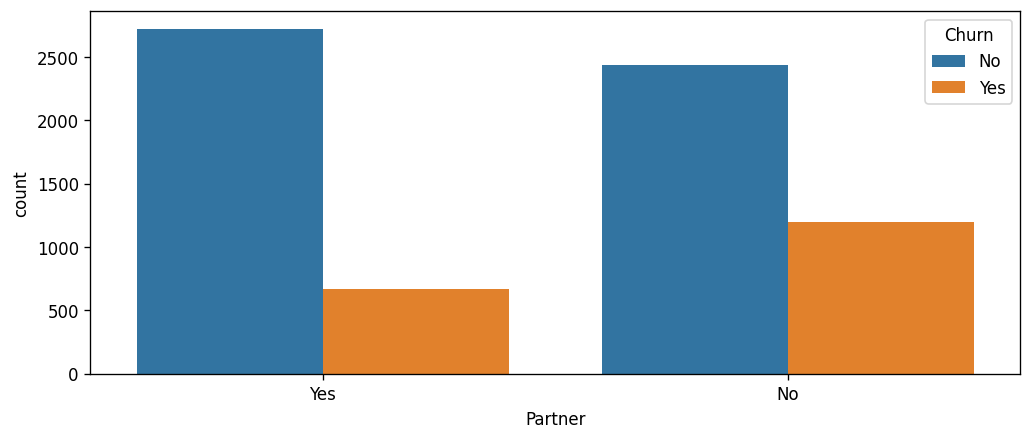

In [37]:
plt.figure(figsize=(10,4), dpi=120)
sns.countplot(data=df, x='Partner', hue='Churn')

Most of the customers who have left the company have a non partner situation

**Churn per Dependents**

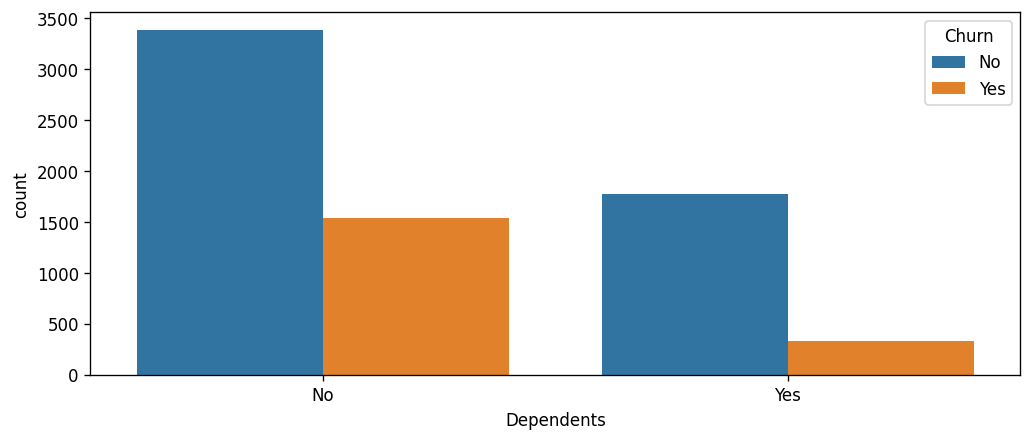

In [38]:
plt.figure(figsize=(10,4), dpi=120)
sns.countplot(data=df, x='Dependents', hue='Churn')

**Dependents Vs TotalCharges by Churn category**

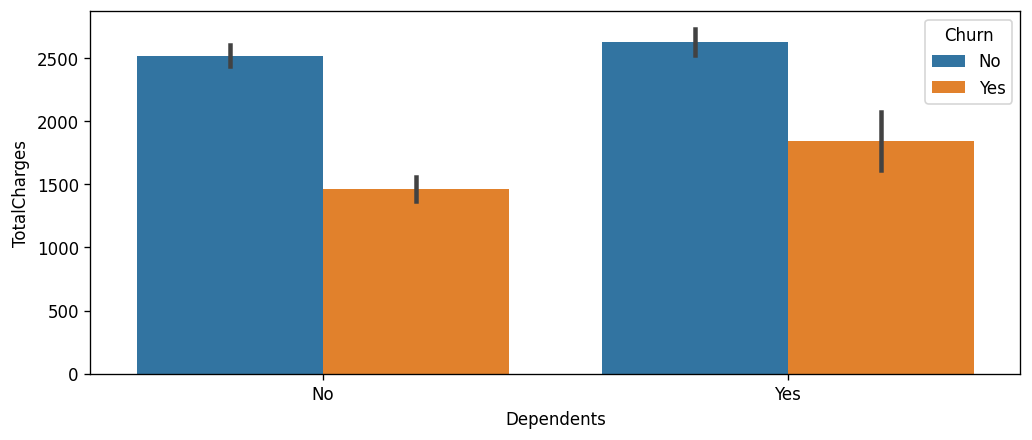

In [39]:
plt.figure(figsize=(10,4), dpi=120)
sns.barplot(data=df, x='Dependents', y='TotalCharges', hue='Churn')

Most of the customers who have left the company have a non dependents situation

**Tenure distribution per Churn categories**

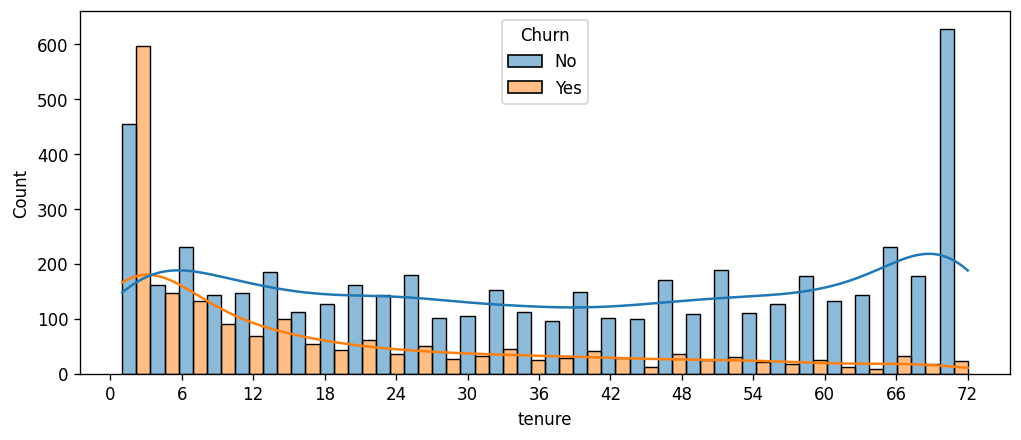

In [40]:
plt.figure(figsize=(10,4), dpi=120)
sns.histplot(data=df, x='tenure', hue='Churn', multiple='dodge', bins=30, 
             palette='tab10', kde=True)
plt.xticks(range(0, 73, 6));

Most of customers whit a tenure between 0 and 12 month have churned the company

**Tenure Vs TotalCharges colored by Churn Category**

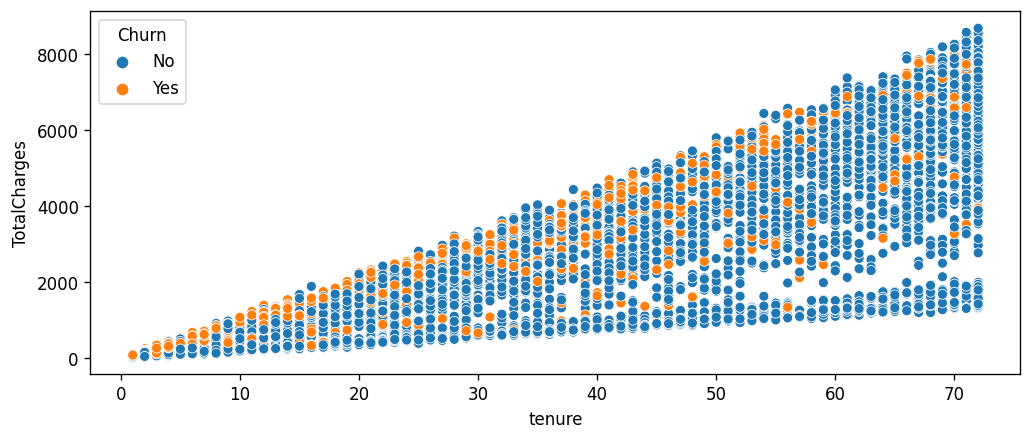

In [41]:
plt.figure(figsize=(10,4), dpi=120)
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn')

**Churn count per PhoneService**

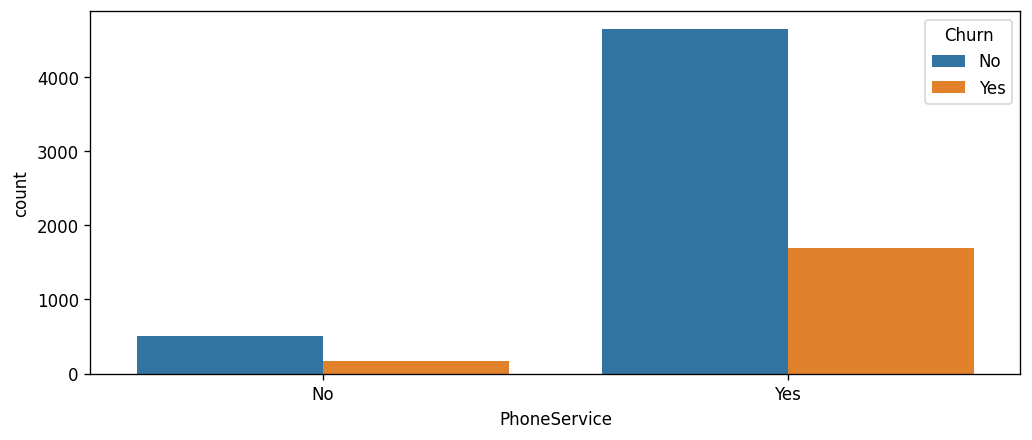

In [42]:
plt.figure(figsize=(10,4), dpi=120)
sns.countplot(data=df, x='PhoneService', hue='Churn', )

## 3.- Machine Learning Models

**Models to use:**

- Support Vector Machine
- Random Forest
- Boosting

### Get dummies features and target

In [43]:
raw_data = pd.get_dummies(df)

In [44]:
X = raw_data.drop(['Churn_Yes', 'Churn_No'], axis=1)

In [45]:
df.Churn = df.Churn.map({'Yes':1, 'No':0})
y = df.Churn

### Train | Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Predictive Modeling

In [48]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

**Creating a function to run the model and classification report**

In [49]:
def run_model(model):
    model = model
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, preds, display_labels=model.classes_)
    print(classification_report(y_test, preds))
    return model

### SVC

In [50]:
from sklearn.svm import SVC

In [51]:
svc = SVC(C=0.9, kernel='linear')

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       557
           1       0.63      0.41      0.50       147

    accuracy                           0.83       704
   macro avg       0.74      0.68      0.70       704
weighted avg       0.81      0.83      0.81       704



SVC(C=0.9, kernel='linear')

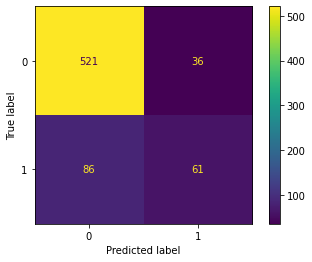

In [52]:
run_model(svc)

### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [54]:
tree = DecisionTreeClassifier(max_depth=7)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       557
           1       0.53      0.56      0.55       147

    accuracy                           0.81       704
   macro avg       0.71      0.72      0.71       704
weighted avg       0.81      0.81      0.81       704



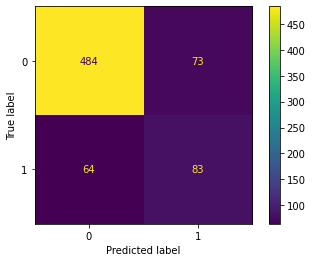

In [55]:
model = run_model(tree)

**Features Importance**

In [56]:
feature_importance = pd.DataFrame(index=X_train.columns, data= model.feature_importances_, columns=['Feature Importance'])

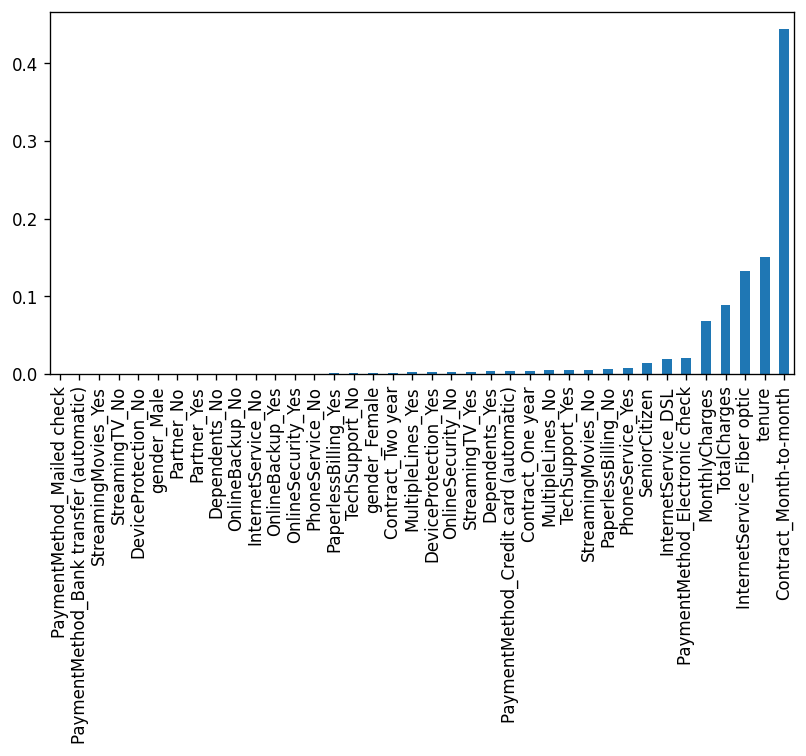

In [57]:
plt.figure(figsize=(8,4), dpi=120)
feature_importance['Feature Importance'].sort_values().plot(kind='bar')

### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(n_estimators=100)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       557
           1       0.49      0.46      0.47       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.78      0.79      0.79       704



RandomForestClassifier()

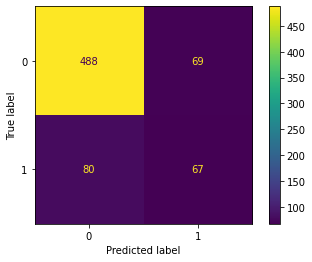

In [60]:
run_model(rf)

### Boosting Tree

**AdaBoost**

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
ada = AdaBoostClassifier(n_estimators=500)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       557
           1       0.59      0.54      0.56       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.82       704



AdaBoostClassifier(n_estimators=500)

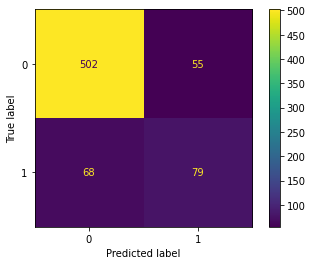

In [63]:
run_model(ada)

**Note:** We can see that the metrics for class 1 are lower than class 2, if we see the countplot of Churn categories we can see there is an imbalance in the data set, so I'm going to use an Over Sampling technique with a Stacking Classifier to improve the metrics

### Modeling with Over Sampling

In [64]:
from imblearn.over_sampling import RandomOverSampler

In [65]:
X_ovr, y_ovr = RandomOverSampler(random_state=101).fit_resample(X, y)

In [66]:
X_ovr_train, X_ovr_test, y_ovr_train, y_ovr_test = train_test_split(X_ovr, y_ovr,
                                                                    test_size=0.30, random_state=101)

**Stacking Classifier**

In [67]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [68]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100 , oob_score = True,)),
    ('svc', SVC(C=0.01, kernel='rbf', random_state = 1)),
    ('adaboost', AdaBoostClassifier())
]

In [69]:
stacking_cfl = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

In [70]:
# help(StackingClassifier)

In [71]:
stacking_cfl.fit(X_ovr_train, y_ovr_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(oob_score=True)),
                               ('svc', SVC(C=0.01, random_state=1)),
                               ('adaboost', AdaBoostClassifier())],
                   final_estimator=LogisticRegression())

In [72]:
y_predict =  stacking_cfl.predict(X_ovr_test)

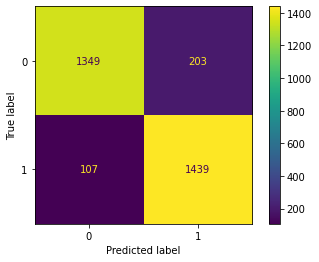

In [73]:
ConfusionMatrixDisplay.from_predictions(y_ovr_test, y_predict)

In [74]:
print( classification_report( y_ovr_test, y_predict ) )

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1552
           1       0.88      0.93      0.90      1546

    accuracy                           0.90      3098
   macro avg       0.90      0.90      0.90      3098
weighted avg       0.90      0.90      0.90      3098



The Stacking Classifier model was the best in results, the metrics of class 1 are bettet with this model than with the other models

## Recommendations

  - Invistigate why customers don't like the fiber optic internet service
  - Stakeholders should implement discounts in the customer plans with parents and dependents, and also with Senior citizen.
  - Implement a bonus to customers who change its contract to longer contract, wich can decrease churn rate
  - Find out the issues with paperless bill and electronic check, and phone service too.
  - Give a discount to customers who buy more than one service, or create service combo.

<hr/>
<hr />